In [1]:
import pandas as pd
import sqlite3
import taxis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import *
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [3]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [4]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [5]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


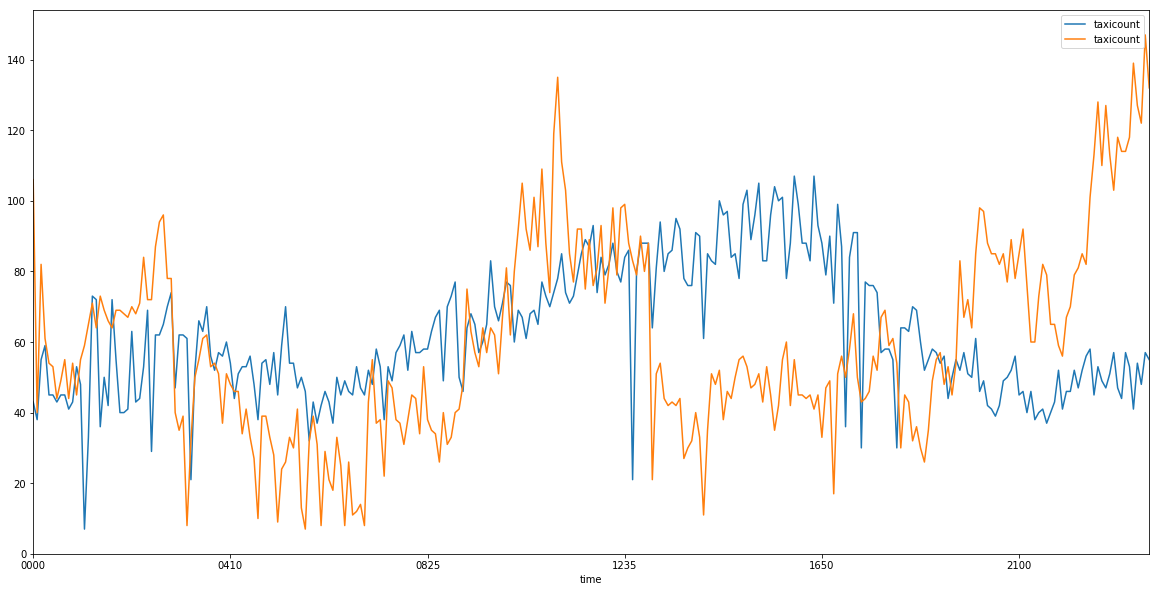

In [6]:
ax=df.query('x==20 and y==12').plot(y='taxicount',x='time')
df.query('x==20 and y==5').plot(ax=ax,y='taxicount',x='time')
plt.show()


In [7]:
data1=taxis.fetch_grid_by_date_and_time("taxis.db","20170627","0905")
df1 = pd.DataFrame(data1)
df1.columns=['x','y','taxicount']
df1.head()


,x,y,taxicount
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [8]:
f=plt.figure()
ax1=f.add_subplot(111,projection='3d')
ax1.bar(df['x'],df['y'],zs=df['taxicount'],zdir='y')
plt.show()

KeyboardInterrupt: 